# 拡散モデルにおける熱力学的不確定性(TUR)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## データ

数字画像MNISTの学習過程の各エポックで生成を行ったもの

In [16]:
TUR_log=pd.read_csv("TUR_log.csv",index_col=False)
TUR_log

epoch  gen_step  entropy production(LHS)        mean            var  \
0         0         0                48.489124 -415.023804  698896.062500   
1         0         1                47.561950   -5.359723     115.545082   
2         0         2                47.490481  231.473572  217481.656250   
3         0         3                48.414568   54.479008   12042.103516   
4         0         4                46.742838   51.654747   10822.573242   
...     ...       ...                      ...         ...            ...   
9975     19       494                 2.700558   -0.059202       0.000716   
9976     19       495                 2.725410   -0.056643       0.000115   
9977     19       496                 2.148780    0.109523       0.002271   
9978     19       497                 1.761701   -0.032255       0.000072   
9979     19       498                 1.334921   -0.033638       0.000039   

      2*mean^2/var (RHS)    LHS/RHS        mean.1         var.1  \
0               0.492905  98.374138  6.893860e+06  7.679949e+13   
1               0.497237  95.652521  1.141082e+03  1.913314e+10   
2               0.492731  96.382097  2.145137e+06  3.634312e+13   
3               0.492931  98.217760  1.187868e+05  1.913716e+12   
4               0.493083  94.797118  1.067479e+05  1.955139e+12   
...                  ...        ...           ...           ...   
9975            9.787737   0.275912  3.684330e-03  6.584856e-04   
9976           55.898152   0.048757  2.058545e-03  4.827586e-04   
9977           10.565359   0.203380  1.426129e-02  1.620653e-03   
9978           28.932479   0.060890 -6.646962e-04  1.216395e-04   
9979           57.715721   0.023129 -1.812109e-04  1.105003e-04   

      2*mean^2/var (RHS).1      LHS/RHS.1      mean.2          var.2  \
0                 1.237646      39.178493 -417.120605  705973.625000   
1                 0.000136  349447.528387   -5.386699     116.715424   
2                 0.253232     187.537772  232.643204  219684.031250   
3                 0.014747    3283.121151   54.754269   12164.059570   
4                 0.011657    4009.994952   51.915619   10932.163086   
...                    ...            ...         ...            ...   
9975              0.041229      65.501728   -0.059247       0.000716   
9976              0.017556     155.242619   -0.056666       0.000115   
9977              0.250991       8.561193    0.109607       0.002270   
9978              0.007264     242.510461   -0.032243       0.000072   
9979              0.000594    2246.054486   -0.033633       0.000039   

      2*mean^2/var (RHS).2  LHS/RHS.2       mean.3         var.3  \
0                 0.492907  98.373822 -6814.005859  1.884051e+08   
1                 0.497218  95.656069 -9481.558594  3.646766e+08   
2                 0.492734  96.381644  7458.534668  2.256997e+08   
3                 0.492932  98.217443  2602.599365  2.746796e+07   
4                 0.493083  94.797114  6122.604492  1.521064e+08   
...                    ...        ...          ...           ...   
9975              9.810026   0.275285    -4.283227  6.225086e+00   
9976             55.921499   0.048736    -0.823443  2.694481e-01   
9977             10.583046   0.203040     0.080206  2.876664e-01   
9978             28.923750   0.060908     0.583771  6.043502e-01   
9979             57.468545   0.023229    -2.353919  1.205600e+00   

      2*mean^2/var (RHS).3  LHS/RHS.3  
0                 0.492881  98.378908  
1                 0.493039  96.466851  
2                 0.492954  96.338655  
3                 0.493194  98.165276  
4                 0.492895  94.833170  
...                    ...        ...  
9975              5.894228   0.458170  
9976              5.032948   0.541514  
9977              0.044725  48.044147  
9978              1.127786   1.562088  
9979              9.192001   0.145226  

[9980 rows x 19 columns]

### 学習ステップ数epochと生成ステップ数generate_num

取得した観測変数4種類


0: RHS (x+xo)/2

1: (x+xo)/2*(x-xo)

2: x

3: x[0,0,0]

In [56]:
epochs=20
generate_num=500
labels=["RHS (x+xo)/2","(x+xo)/2*(x-xo)","x","x[0,0,0]"]

In [48]:
TUR_log.columns

Index(['epoch', 'gen_step', 'entropy production(LHS)', 'mean', 'var',
       '2*mean^2/var (RHS)', 'LHS/RHS', 'mean.1', 'var.1',
       '2*mean^2/var (RHS).1', 'LHS/RHS.1', 'mean.2', 'var.2',
       '2*mean^2/var (RHS).2', 'LHS/RHS.2', 'mean.3', 'var.3',
       '2*mean^2/var (RHS).3', 'LHS/RHS.3'],
      dtype='object')

$\sigma \ge \frac{2<R>^2}{<\Delta R^2>} $

$\sigma =\int dx \frac{{\bf J}^T D^{-1} {\bf J}}{P}$

## DDPMのエントロピー生成(左辺)

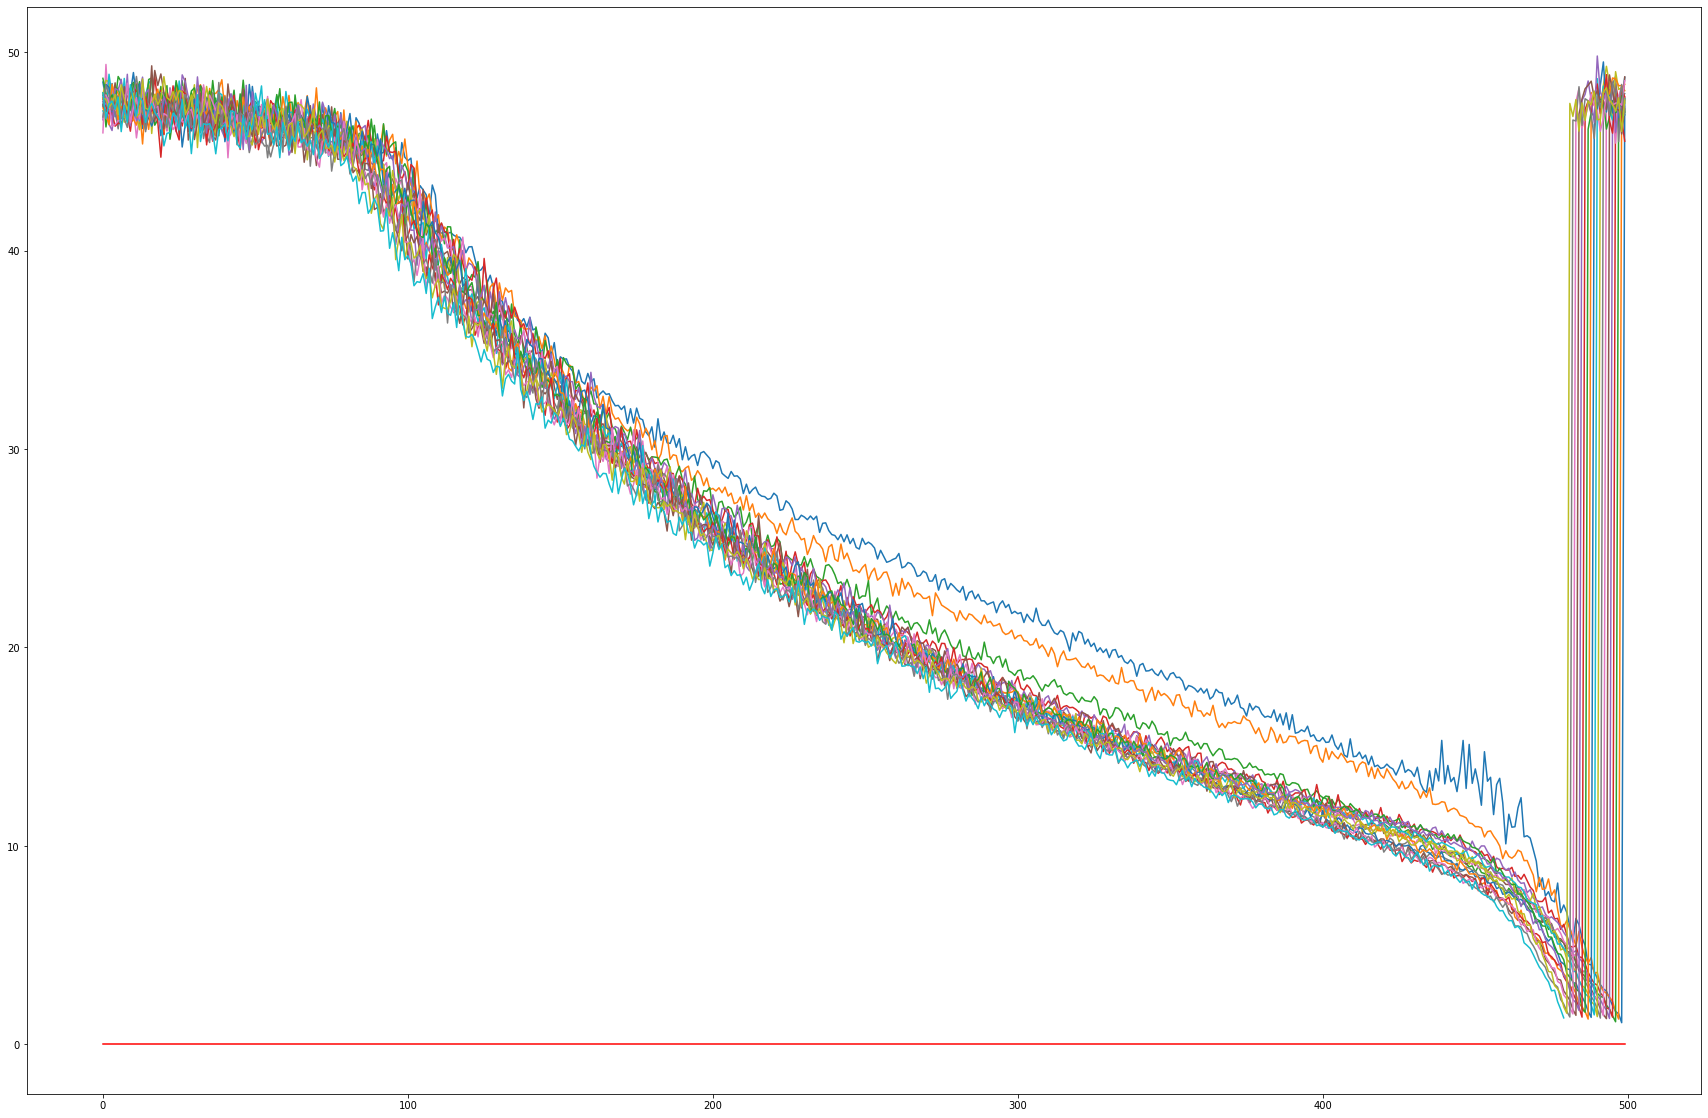

In [58]:
plt.figure(figsize=(30,20))
plt.plot([0]*generate_num,color='red')
for i in range(epochs):
    plt.plot(TUR_log["entropy production(LHS)"][i*generate_num:(i+1)*generate_num].values)

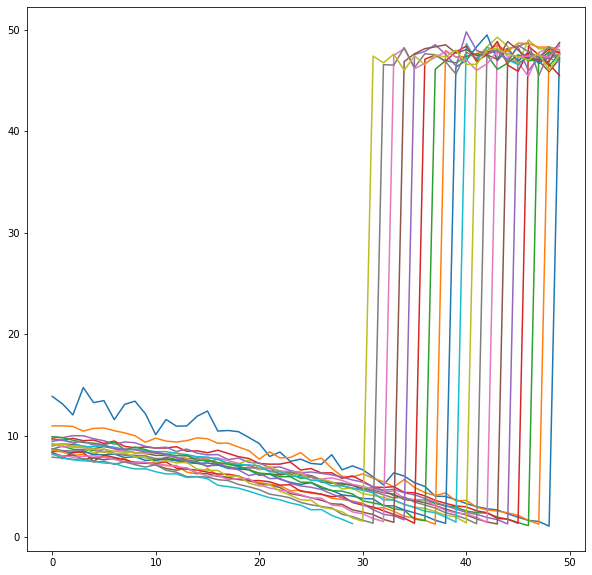

In [111]:
plt.figure(figsize=(10,10))
for i in range(epochs):
    plt.plot(TUR_log["entropy production(LHS)"][i*generate_num+450:(i+1)*generate_num].values)

最後20ステップくらいから値が飛ぶ

In [119]:
?plt.plot

In [120]:
#プロット用関数
def plot_generates(df,generate_num=generate_num,fmt="o-"):
    plt.figure(figsize=(30,20))
    plt.plot([0]*generate_num,color='red')
    for i in range(epochs):
        q=df[i*generate_num:(i+1)*generate_num].values
        plt.plot(q,fmt)
    
def plot_generates_log(df,generate_num=generate_num,fmt="o-"):
    plt.figure(figsize=(30,20))
    plt.plot([0]*generate_num,color='red')
    for i in range(epochs):
        q=df[i*generate_num:(i+1)*generate_num].values
        plt.plot(np.log(q),fmt)
    
    
def plot_per_epoch(df,islog=True,offset=0,generate_num=generate_num,fmt="o-"):
    plt.figure(figsize=(15,10))

    for i in range(10):        
        start=i*50+offset
        q=df[start::generate_num].values
        if(islog):
            q=np.log(q)       
        plt.plot(q,fmt,label=str(start))
        plt.legend(loc='upper right')
    plt.show()


## 各学習ステップ(エポック)における生成過程での取得量の推移を重ね書きしたもの

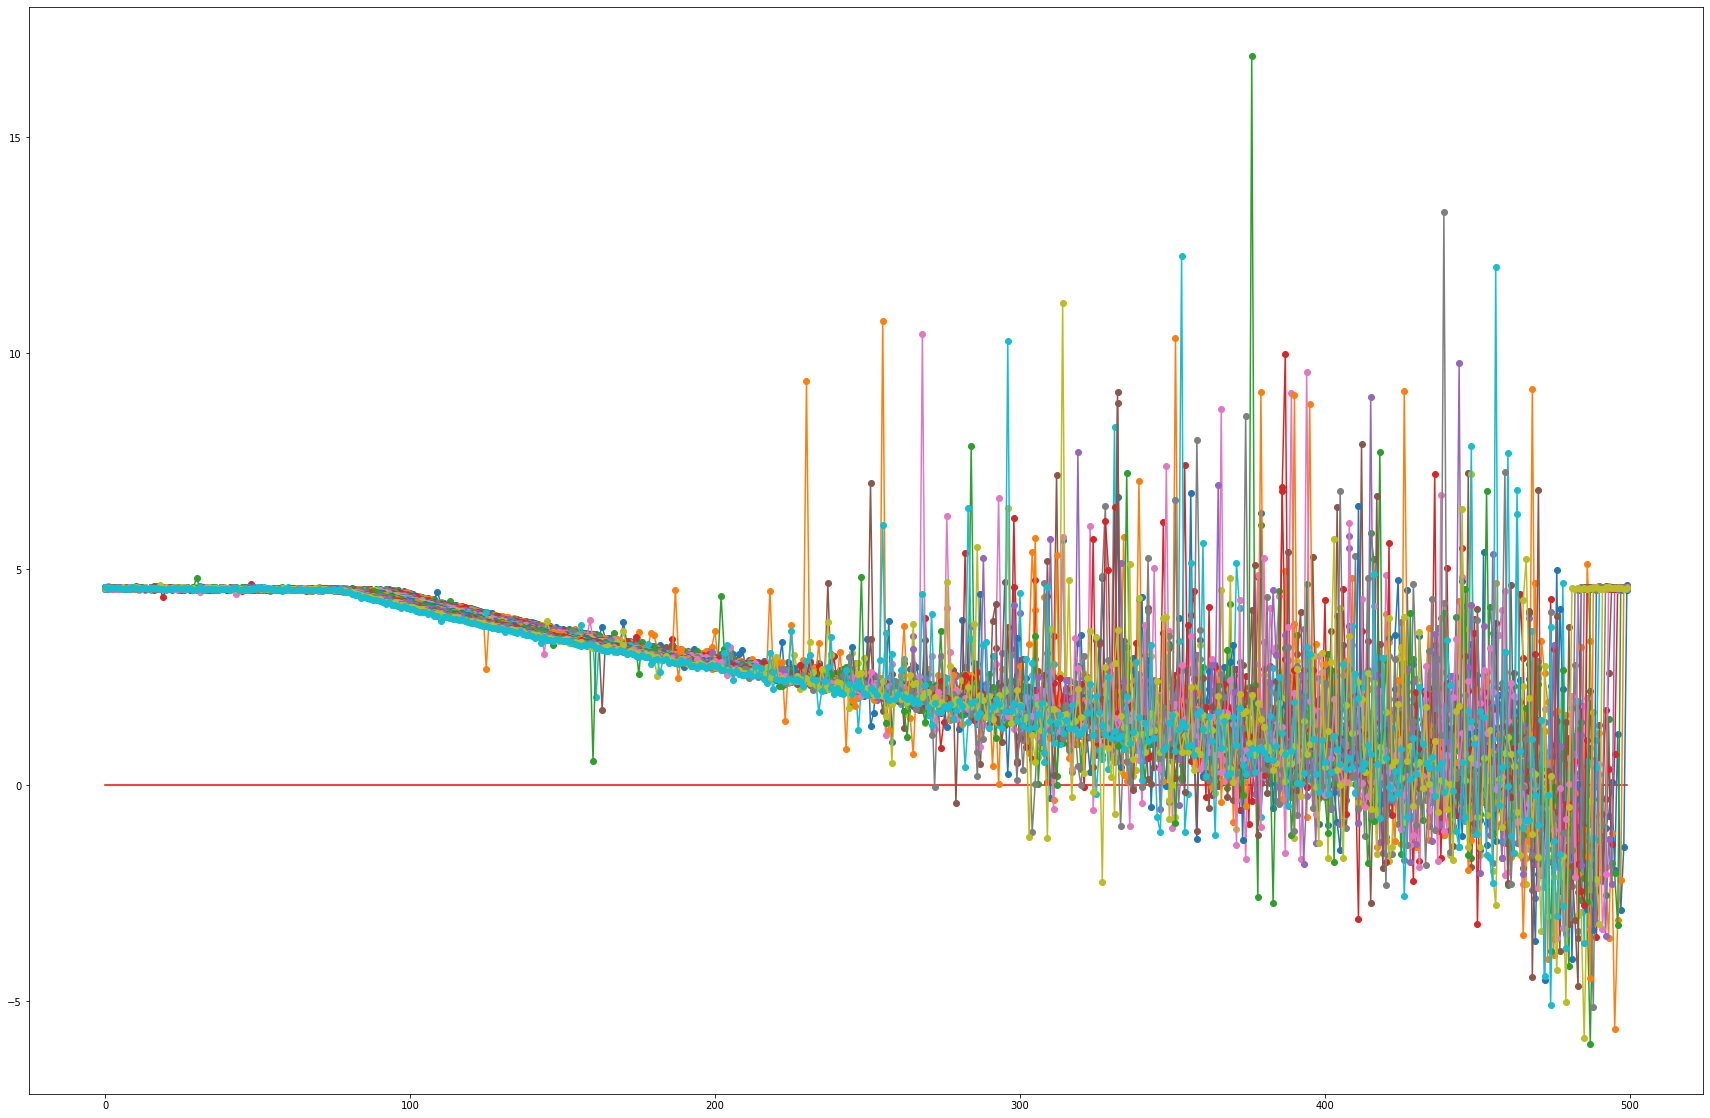

In [65]:
plot_generates_log(TUR_log["LHS/RHS"])

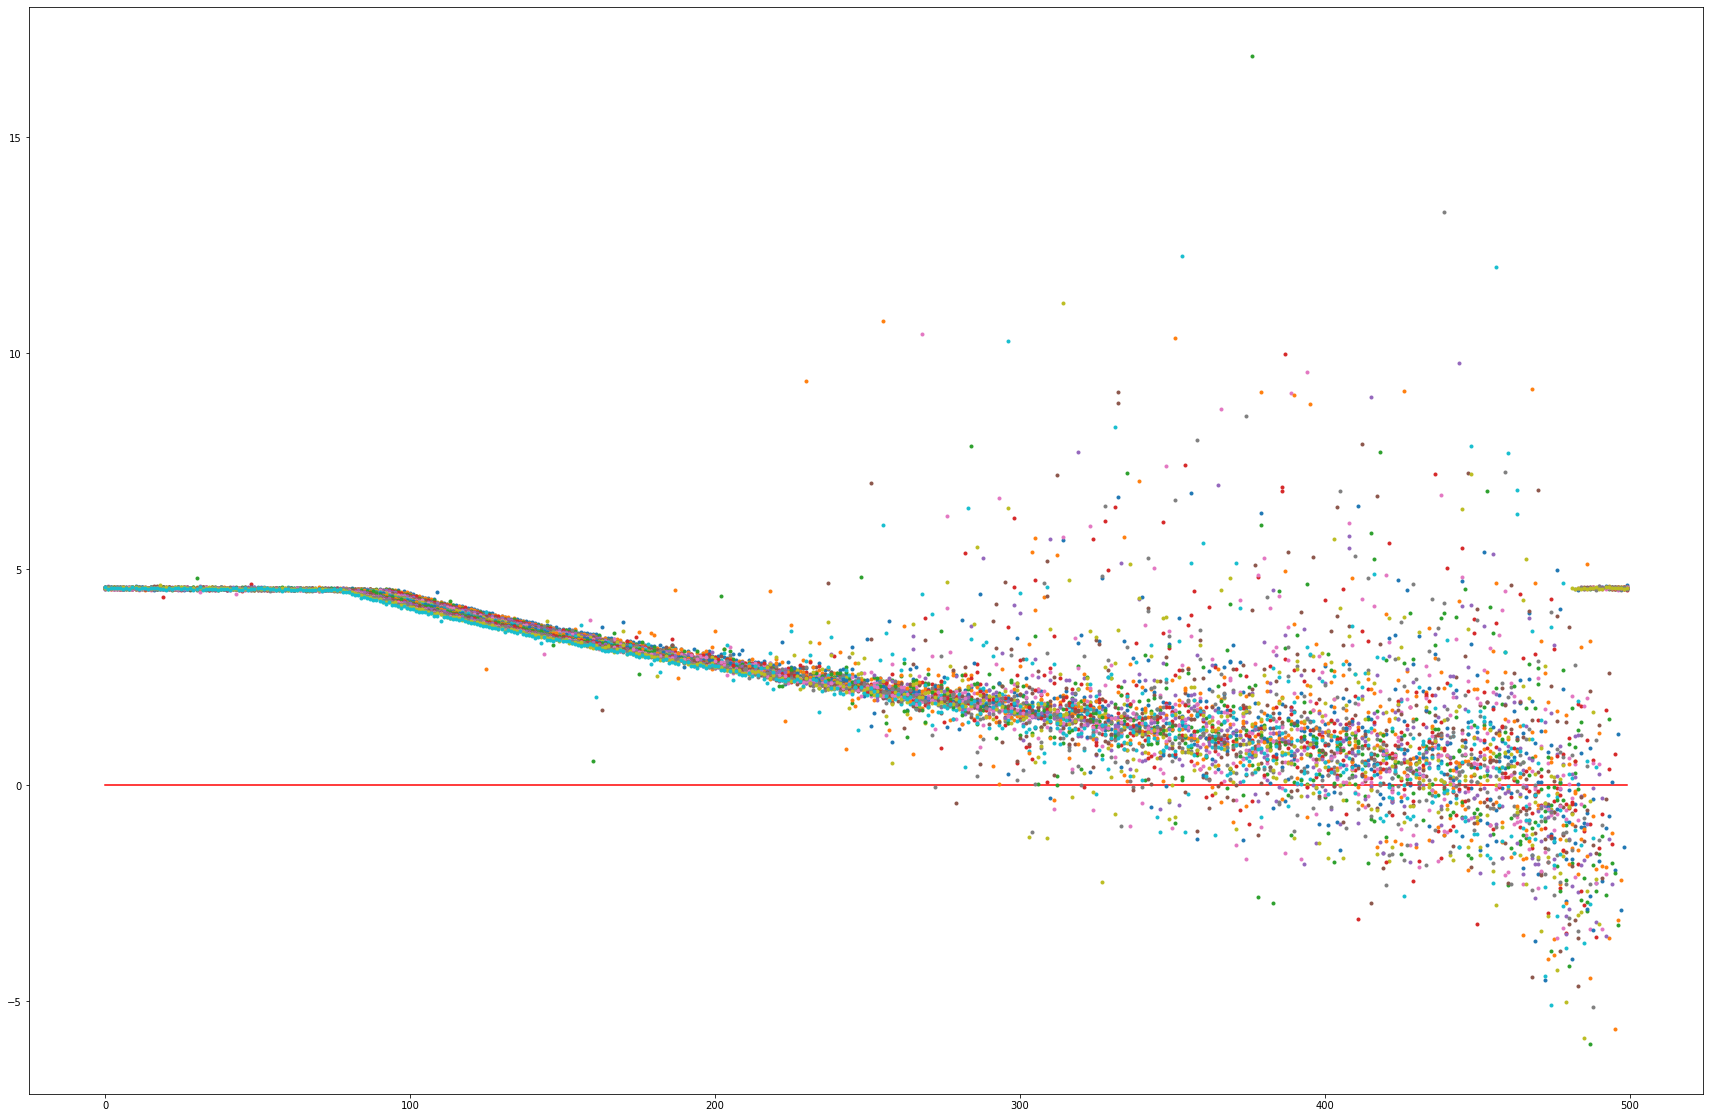

In [121]:
plot_generates_log(TUR_log["LHS/RHS"],fmt=".")

/tmp/ipykernel_336240/440506046.py:6: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),"o-")
/tmp/ipykernel_336240/440506046.py:6: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),"o-")
/tmp/ipykernel_336240/440506046.py:6: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),"o-")
/tmp/ipykernel_336240/440506046.py:6: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),"o-")
/tmp/ipykernel_336240/440506046.py:6: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),"o-")
/tmp/ipykernel_336240/440506046.py:6: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),"o-")
/tmp/ipykernel_336240/440506046.py:6: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),"o-")
/tmp/ipykernel_336240/440506046.py:6: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),"o-")
/tmp/ipykernel_336240/440506046.py:6: RuntimeWarning: invalid value encountered in log
 

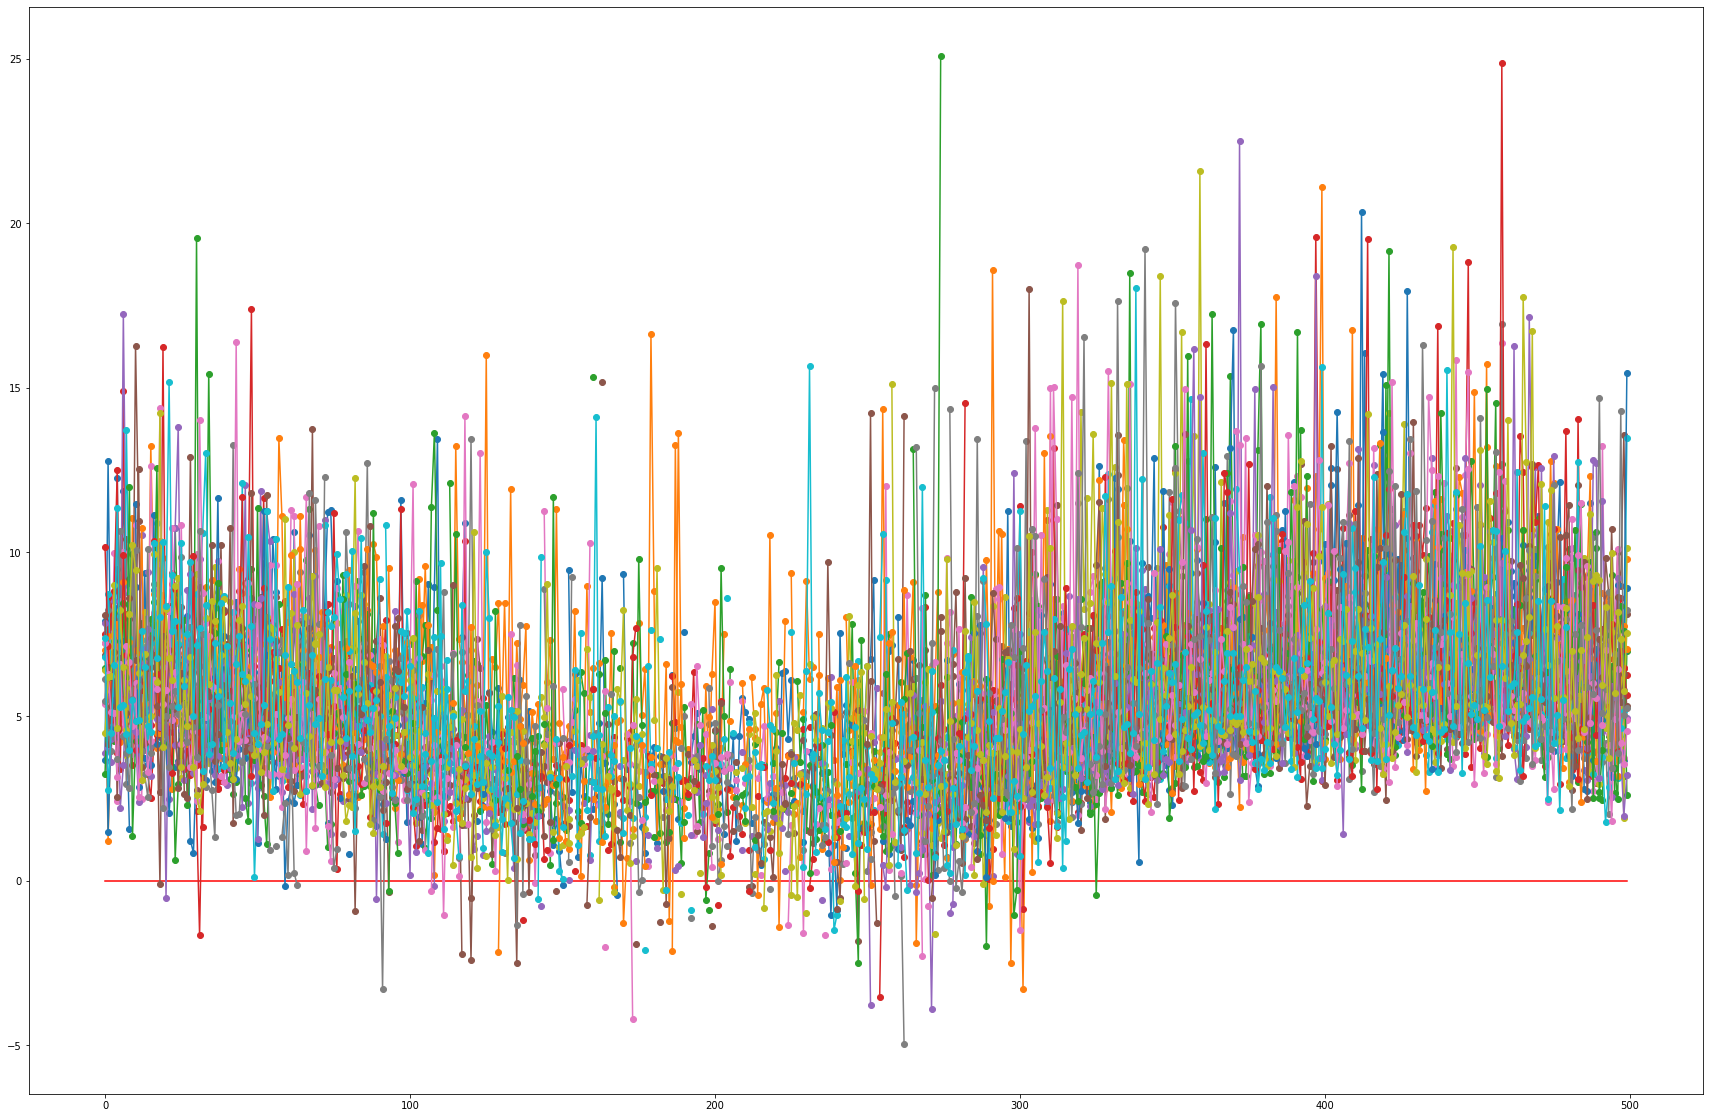

In [66]:
plot_generates_log(TUR_log["LHS/RHS.1"])

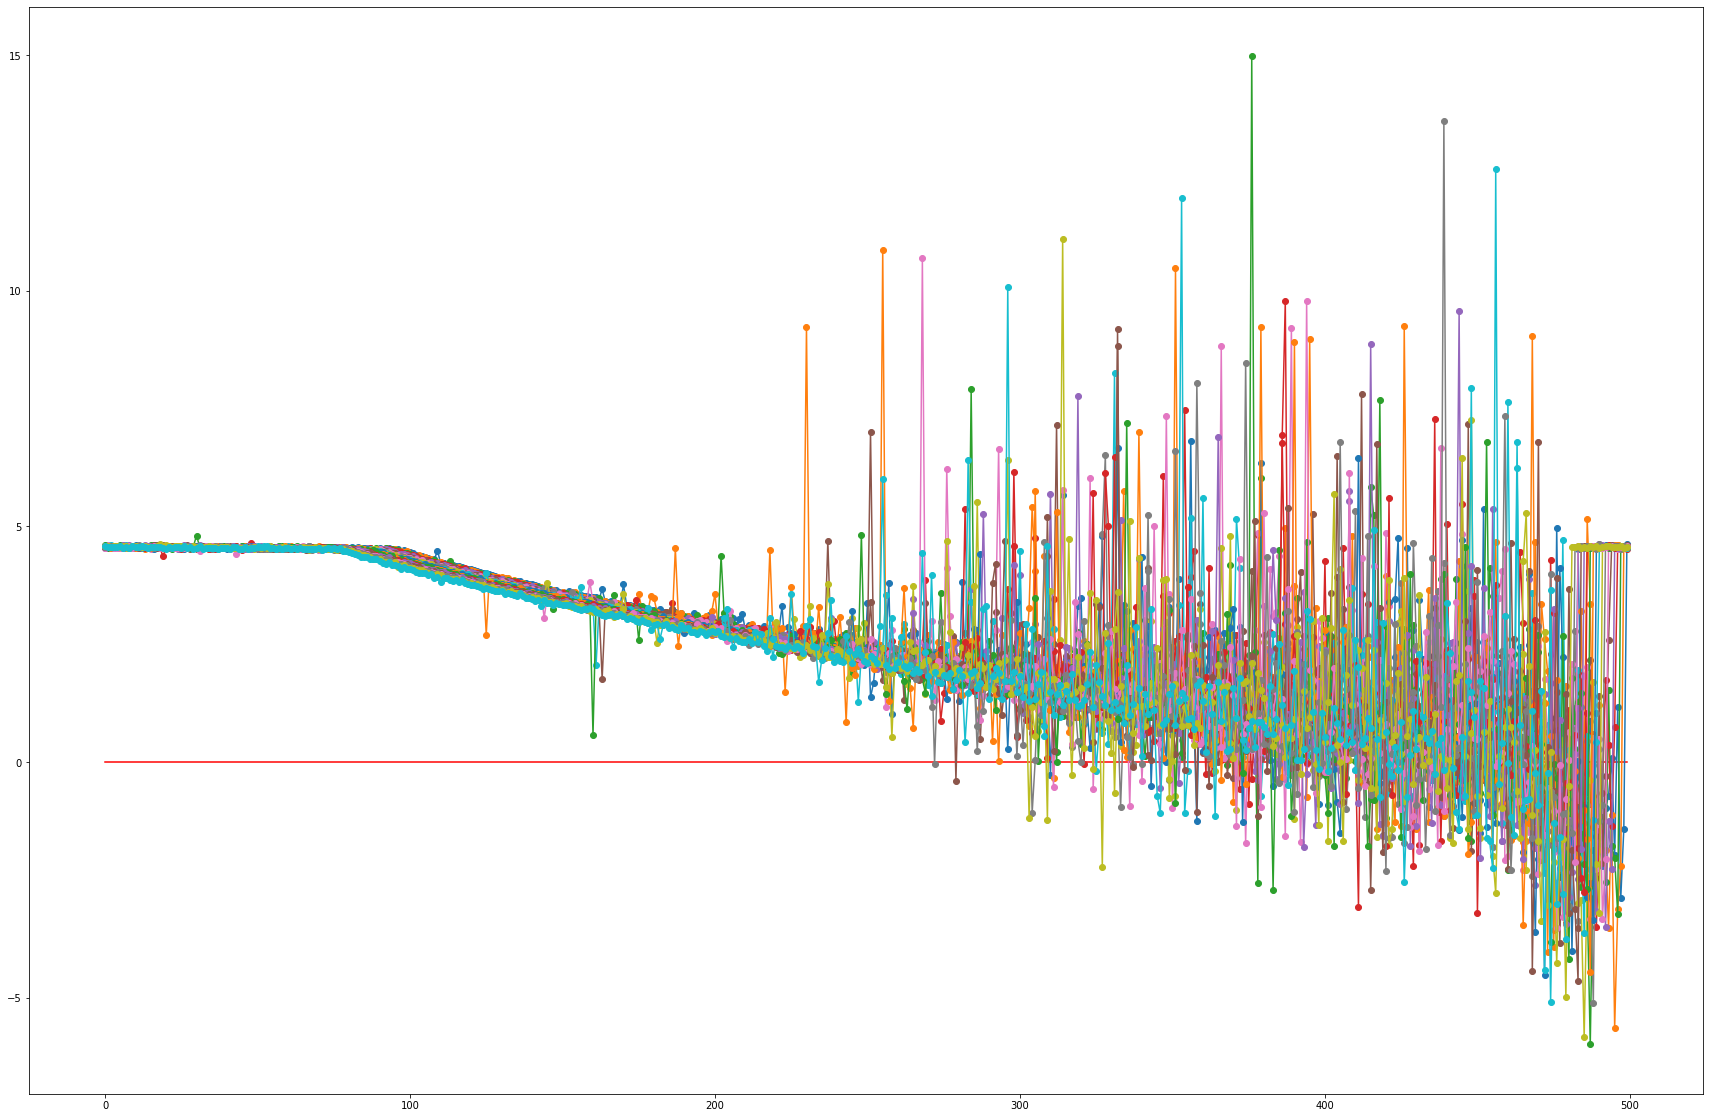

In [112]:
plot_generates_log(TUR_log["LHS/RHS.2"])

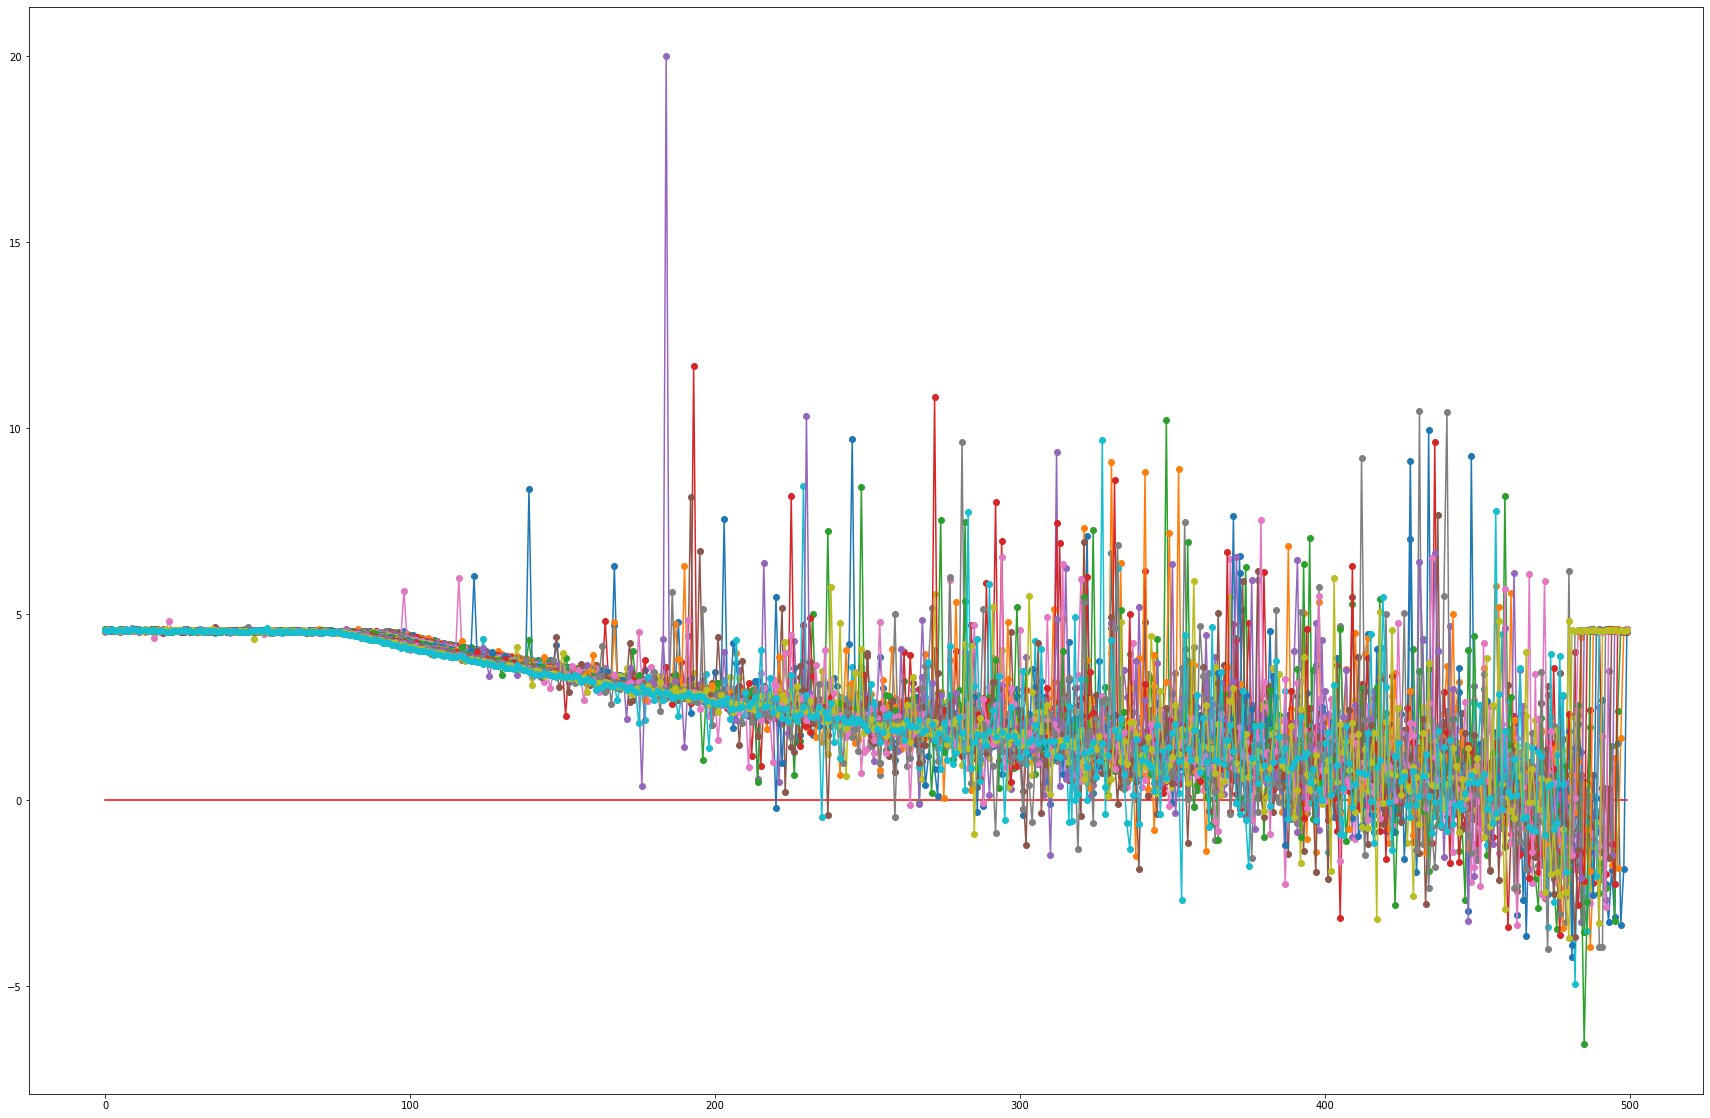

In [68]:
plot_generates_log(TUR_log["LHS/RHS.3"])

## 生成ステップ番号を固定した場合の取得量の学習ステップ(エポック)に対する変化

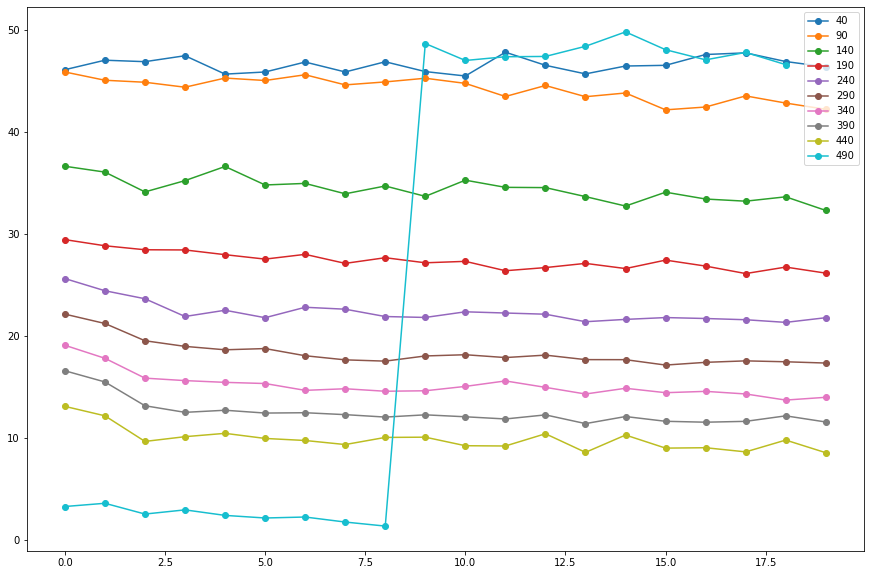

In [107]:
plot_per_epoch(TUR_log["entropy production(LHS)"],islog=False,offset=40)   

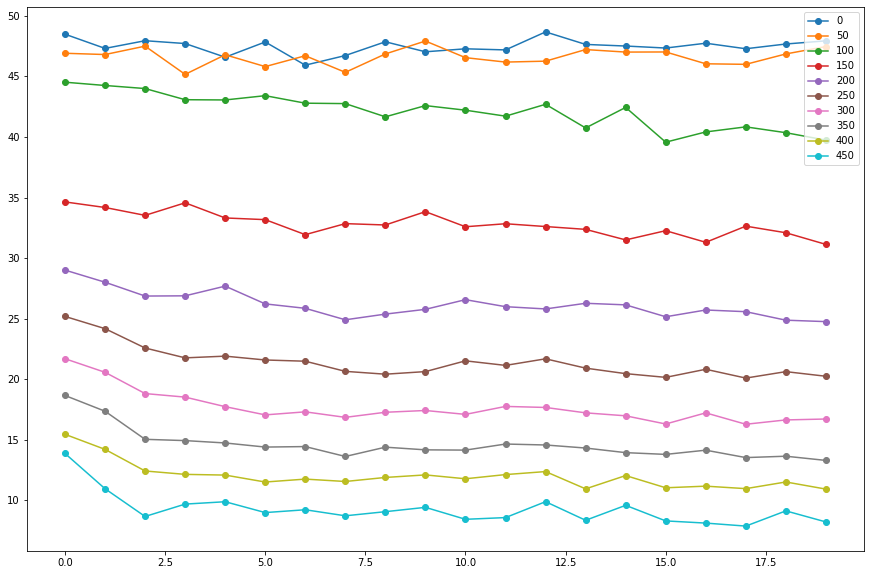

In [106]:
plot_per_epoch(TUR_log["entropy production(LHS)"],islog=False)

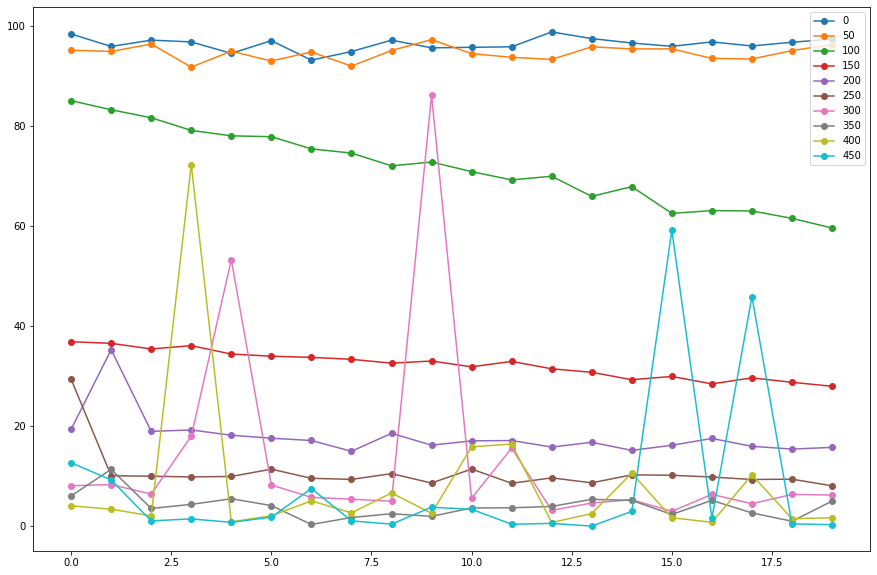

In [109]:
plot_per_epoch(TUR_log["LHS/RHS"],islog=False,offset=0)

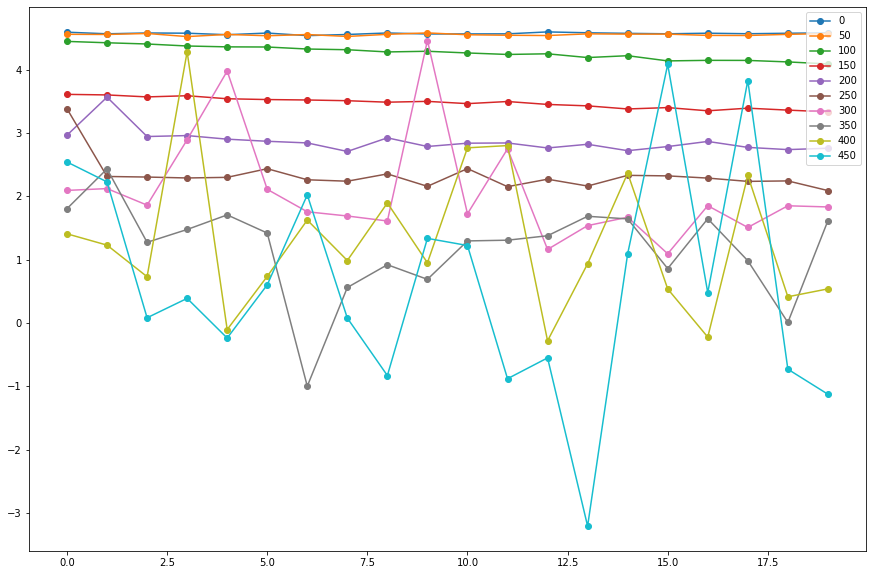

In [110]:
plot_per_epoch(TUR_log["LHS/RHS"],offset=0)

/tmp/ipykernel_336240/591425732.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)
/tmp/ipykernel_336240/591425732.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)
/tmp/ipykernel_336240/591425732.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)
/tmp/ipykernel_336240/591425732.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)


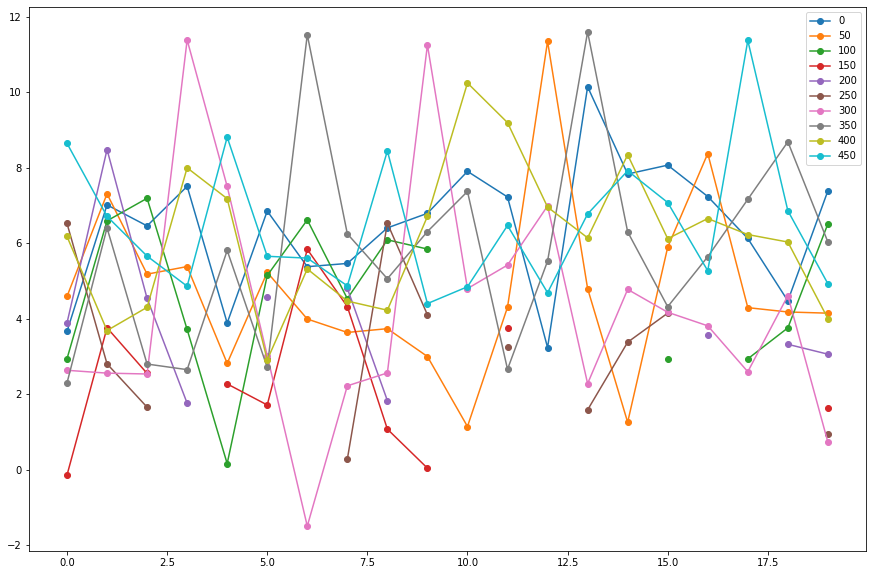

In [118]:
plot_per_epoch(TUR_log["LHS/RHS.1"],offset=0)

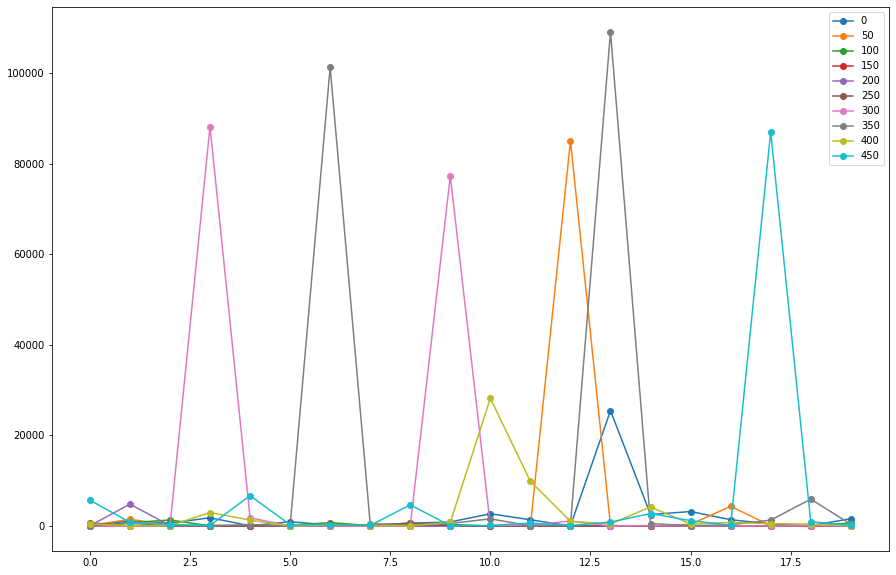

In [117]:
plot_per_epoch(TUR_log["LHS/RHS.1"],islog=False,offset=0)

## 右辺の量のプロット

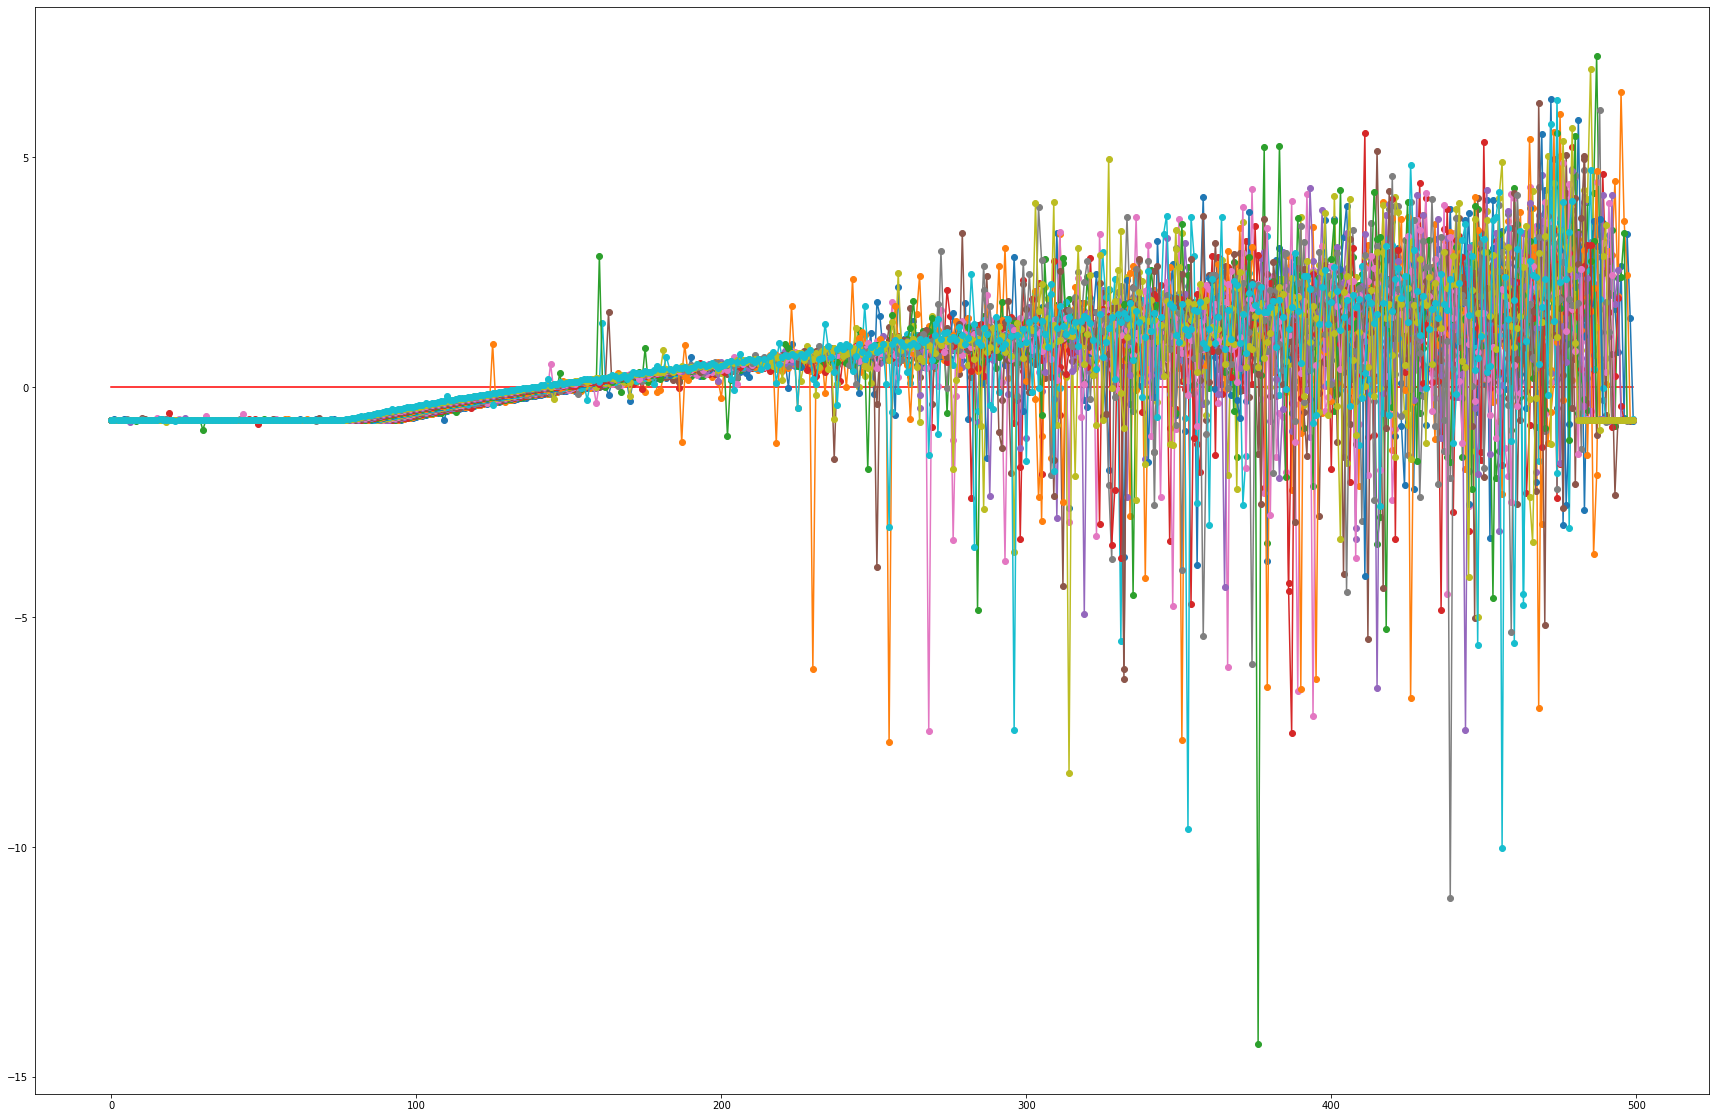

In [73]:
plot_generates_log(TUR_log["2*mean^2/var (RHS)"])

### 統計量のプロット

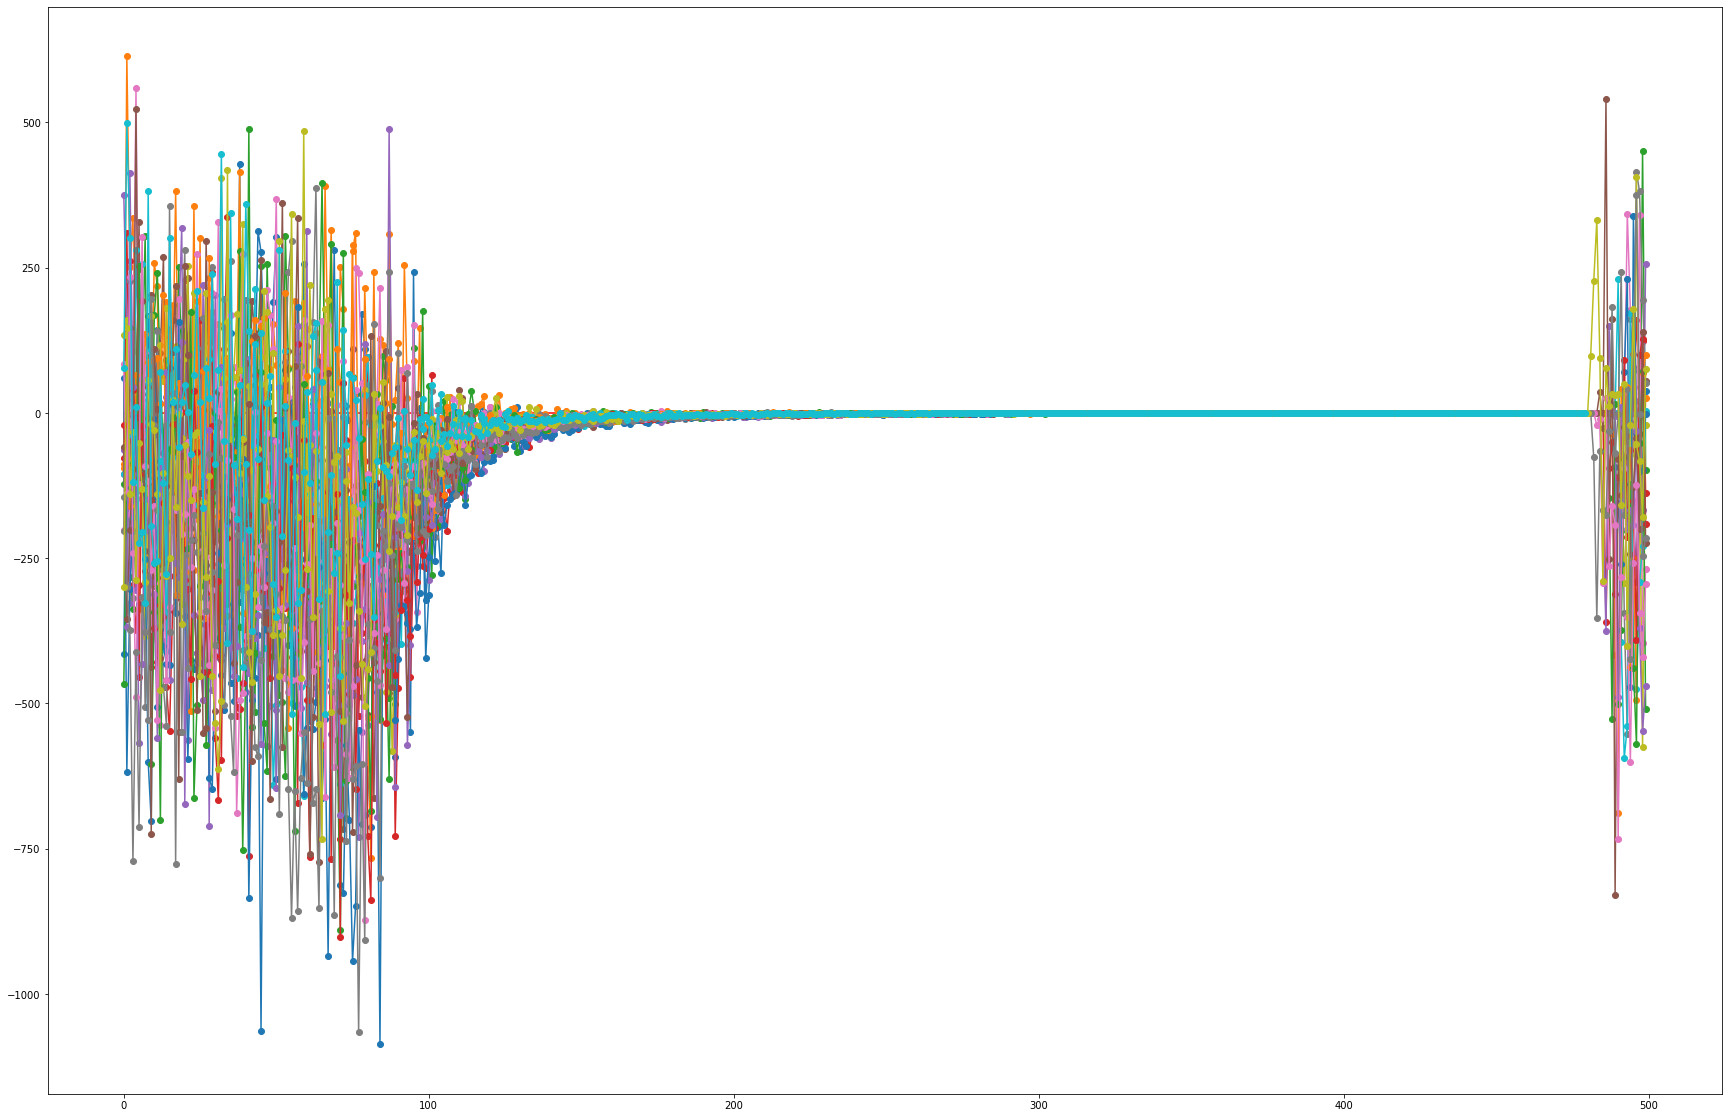

In [76]:
plot_generates(TUR_log["mean"])

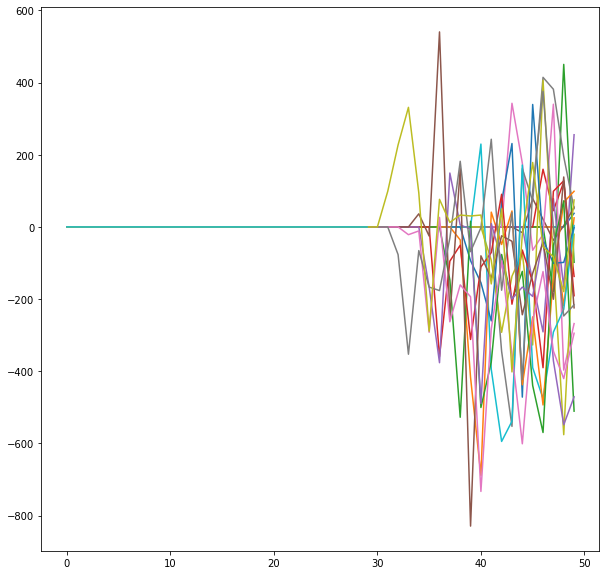

In [116]:
plt.figure(figsize=(10,10))
for i in range(epochs):
    plt.plot(TUR_log["mean"][i*generate_num+450:(i+1)*generate_num].values)
    

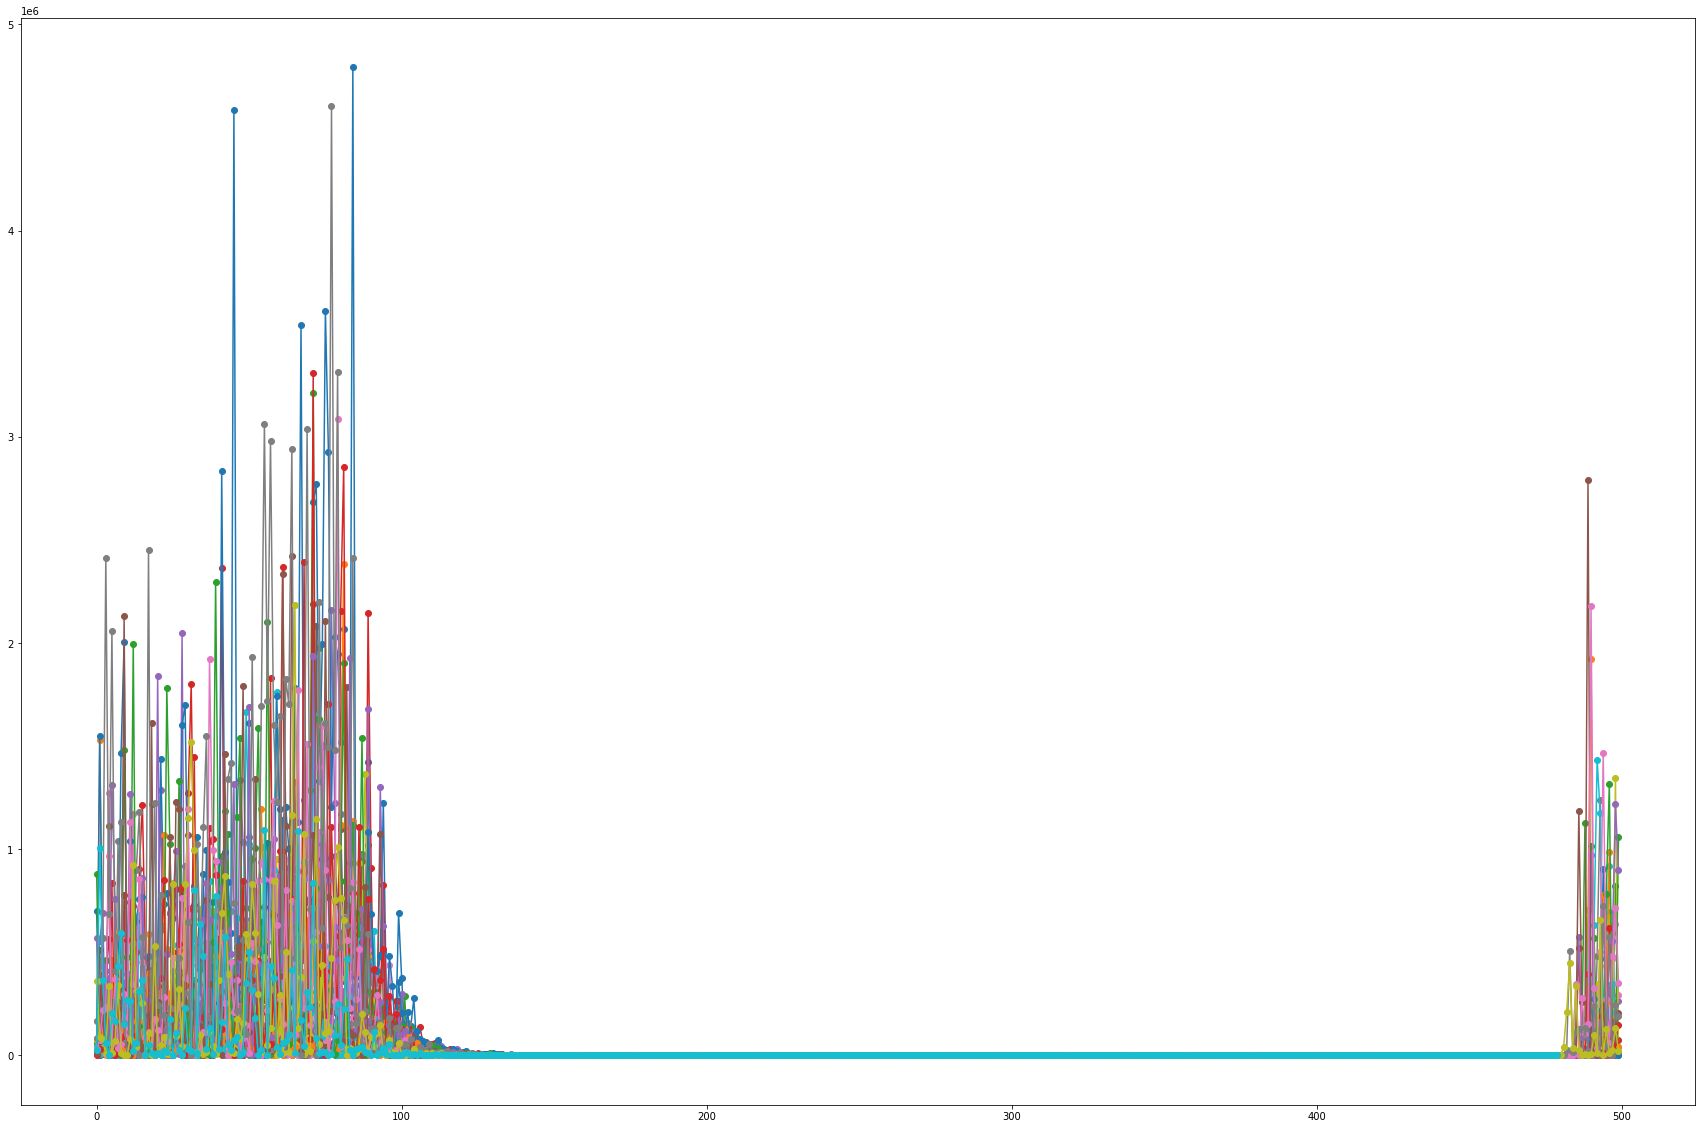

In [82]:
plot_generates(TUR_log["var"])

やはり最後20ステップが乱れている

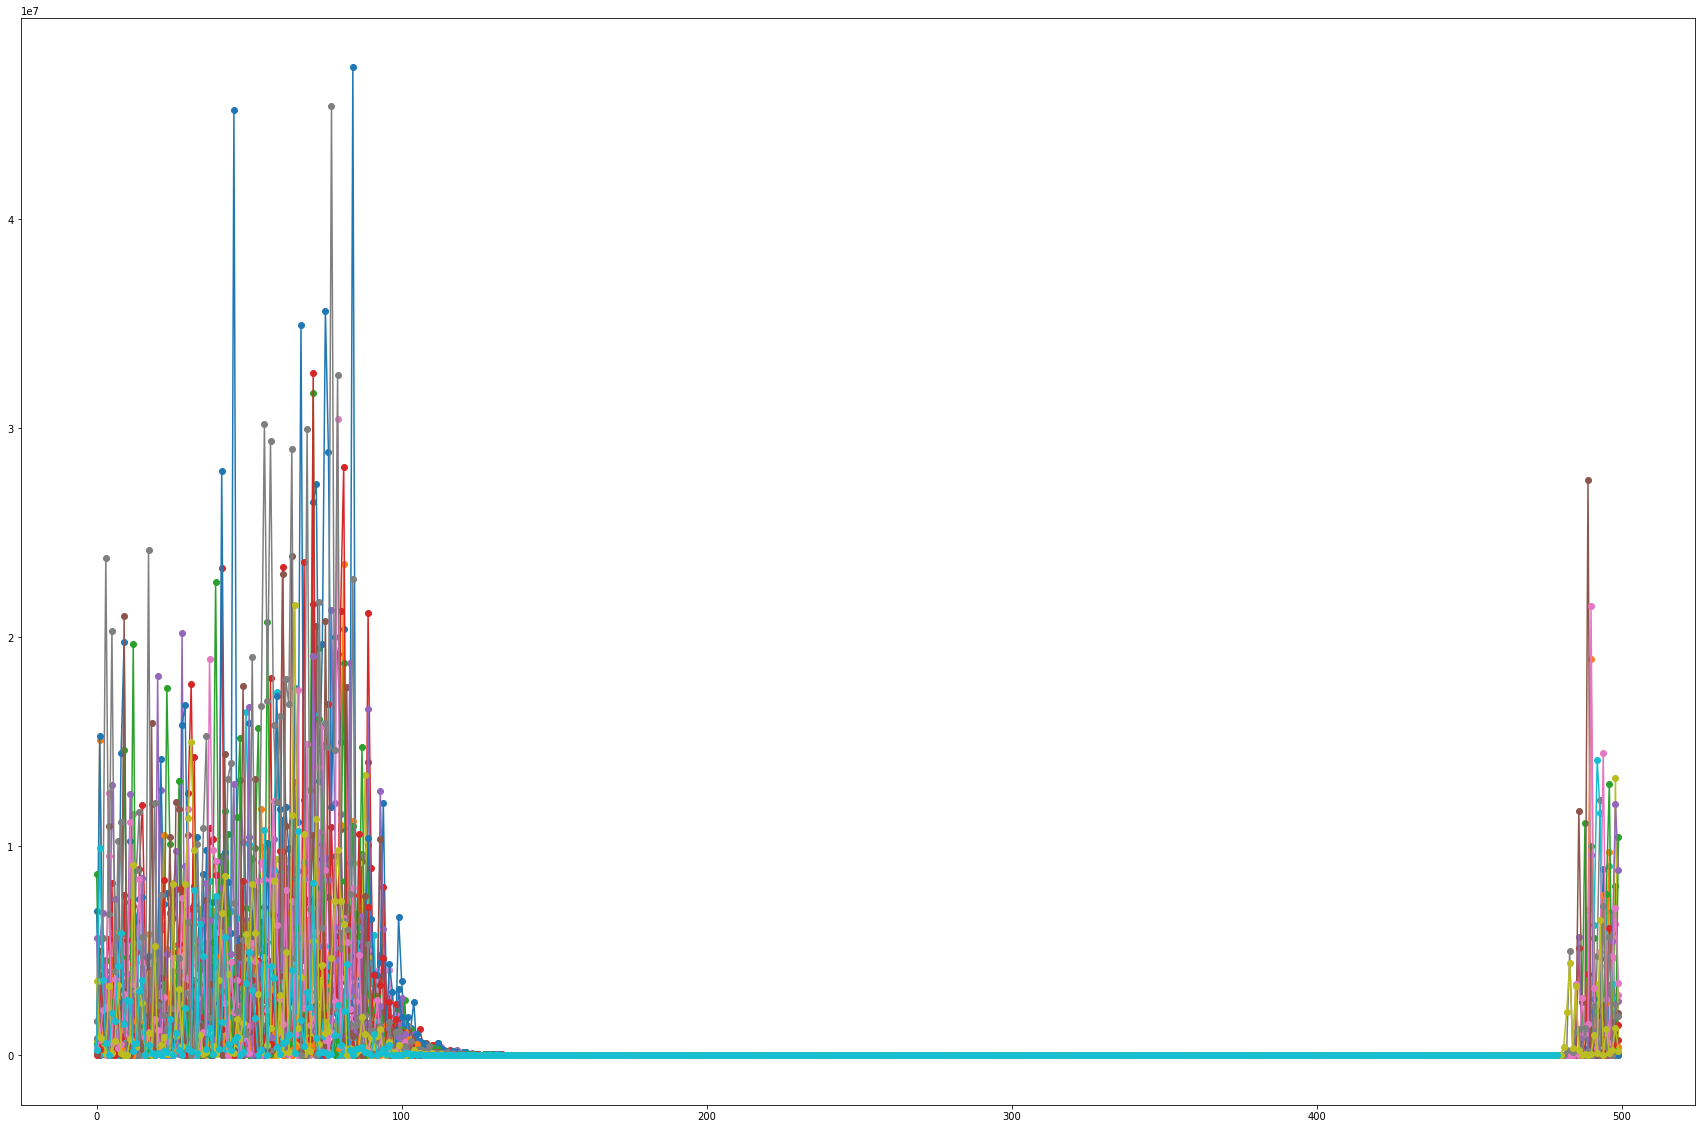

In [81]:
plot_generates(TUR_log["mean.1"])

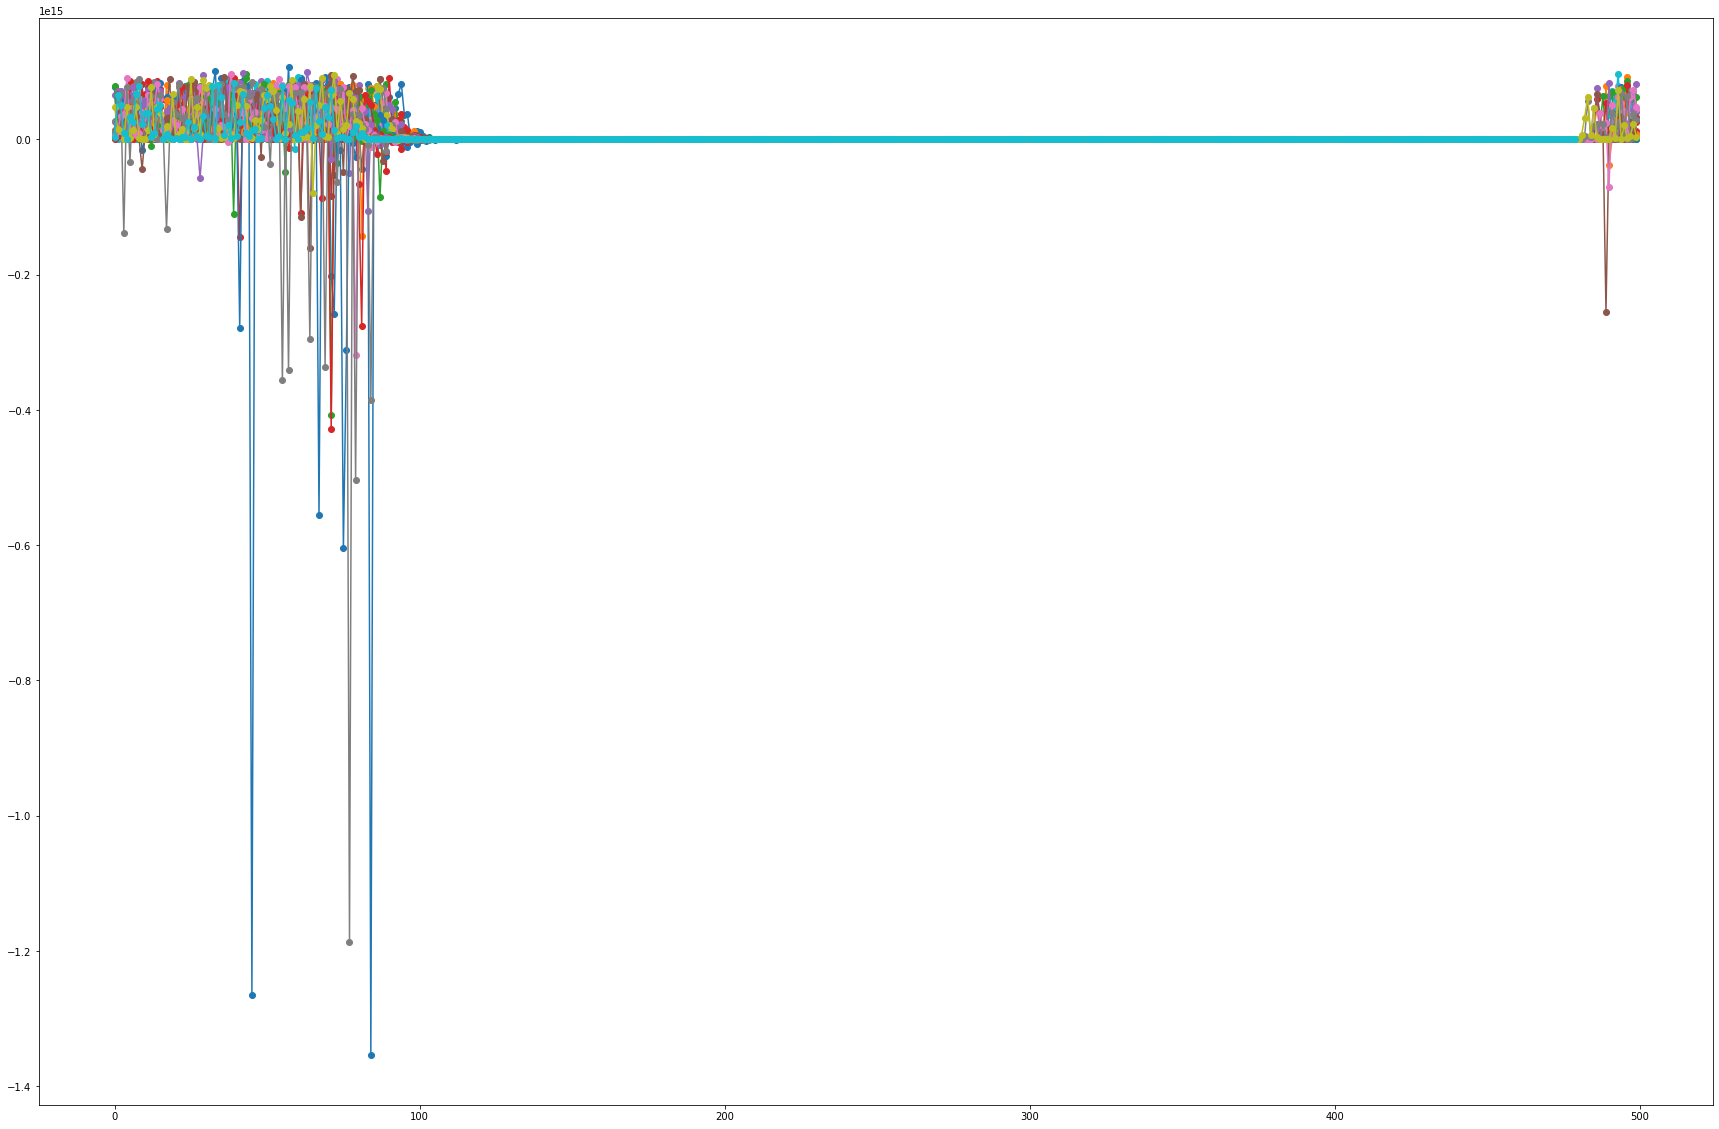

In [114]:
plot_generates(TUR_log["var.1"])

Varianceが負になるのはおかしい